In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks')

In [5]:
import pandas as pd
df=pd.read_csv('Student_Performance.csv')

In [6]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [ ]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [ ]:
df.dtypes

,0
Hours Studied,int64
Previous Scores,int64
Extracurricular Activities,object
Sleep Hours,int64
Sample Question Papers Practiced,int64
Performance Index,float64


In [ ]:
df=df.drop(['Extracurricular Activities'],axis=1)

In [ ]:
df.dtypes

,0
Hours Studied,int64
Previous Scores,int64
Sleep Hours,int64
Sample Question Papers Practiced,int64
Performance Index,float64


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
features=['Hours Studied','Previous Scores','Sleep Hours','Sample Question Papers Practiced','Performance Index']
X=df[features]


In [ ]:
#standardize data
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
#apply PCA
pca=PCA(n_components=2)
X_pca=pca.fit_transform(X_scaled)
#create dataframe with principle components
df_pca=pd.DataFrame(data=X_pca,columns=['PC1','PC2'])

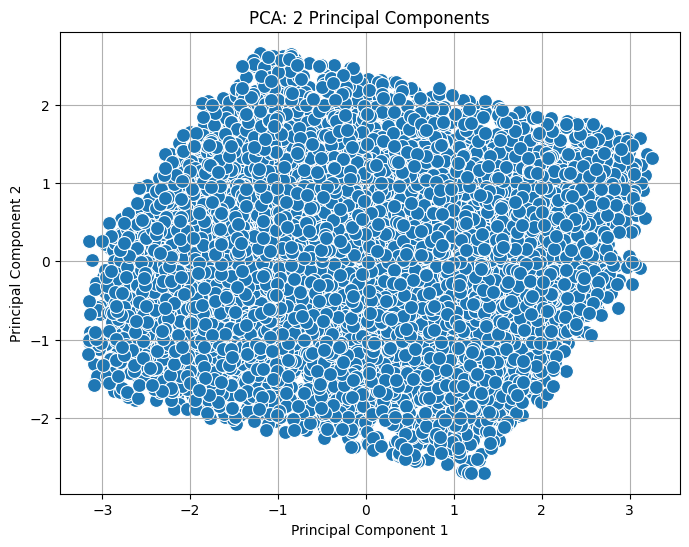

In [ ]:
# Step 4: Visualize
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', data=df_pca, s=100)
plt.title('PCA: 2 Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

Principal Component 1 (PC1) on the X-axis:

This is the direction (linear combination of original features) that captures the most variance in the data.

Principal Component 2 (PC2) on the Y-axis:

This is the second-most important direction, orthogonal to PC1, capturing the next highest variance.

a cloud or blob of points — this tells you how the data spreads across the top 2 principal directions.

If the spread is wide along PC1, most of the information is captured there

Denser areas have more overlapping data points (many samples share similar principal component values)

No Clear Clusters Visible:

The plot appears densely packed and continuous, without distinct separations or groupings.

This suggests that your data does not have strong natural clusters

In [ ]:
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total variance captured:", sum(pca.explained_variance_ratio_))


Explained variance ratio: [0.39748474 0.20364593]
Total variance captured: 0.6011306650703476


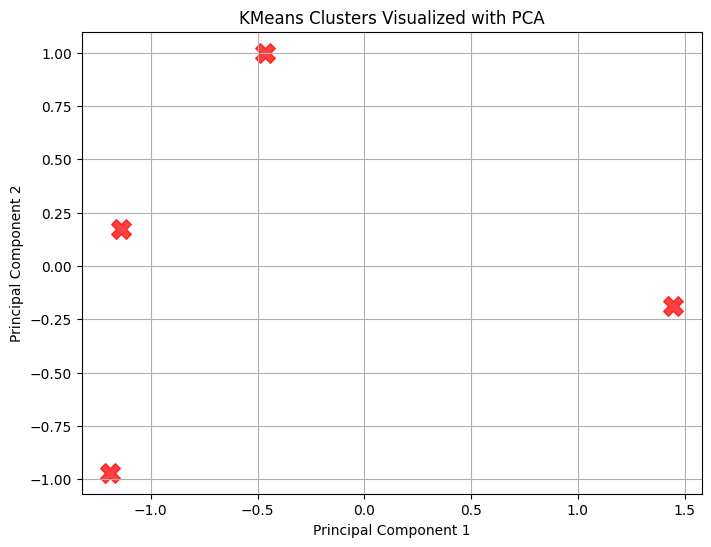

In [ ]:
#after applying both kmeans and PCA
#first apply kmeans to scaled data
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=4,random_state=42)
clusters=kmeans.fit(X_scaled)

#second apply pca to same scaled data
pca=PCA(n_components=2)
X_pca=pca.fit_transform(X_scaled)


# Plot the clusters
plt.figure(figsize=(8, 6))
centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('KMeans Clusters Visualized with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

The dataset has clear groupings (clusters), and dimensionality reduction using PCA still preserved this structure. This means your unsupervised pipeline (scaling → KMeans → PCA) is working well and has produced meaningful clusters that are distinguishable in lower dimensions.

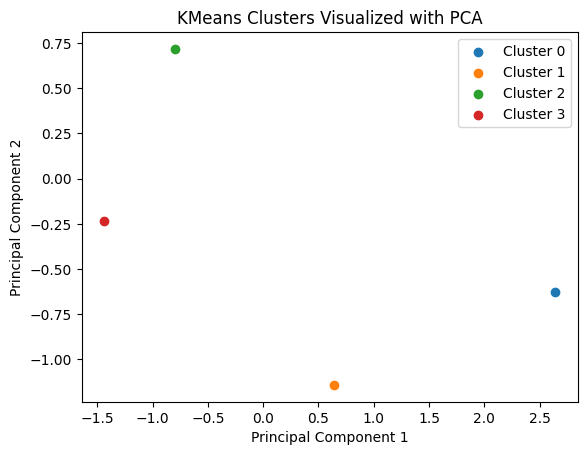

In [ ]:
#adding labels to clusters
# Get the cluster labels from the fitted KMeans object
cluster_labels = kmeans.labels_
unique_clusters=set(cluster_labels)
for clusters in unique_clusters:
  plt.scatter(df_pca.loc[clusters,'PC1'],df_pca.loc[clusters,'PC2'],label=f'Cluster {clusters}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clusters Visualized with PCA')
plt.legend()  # Show legend with cluster names
plt.show()

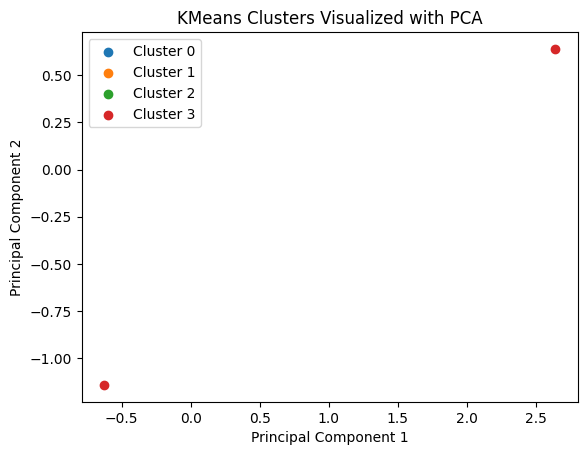

In [ ]:
cluster_labels = kmeans.labels_
unique_clusters=set(cluster_labels)
for cluster in unique_clusters:
    plt.scatter(
        X_pca[clusters == cluster, 0],
        X_pca[clusters == cluster, 1],
        label=f'Cluster {cluster}'
    )
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clusters Visualized with PCA')
plt.legend()  # Show legend with cluster names
plt.show()

Cluster	Description
2 (green)	High performers
1 (orange)	Low performers
0 (blue)	Moderate performers
3 (red)	Moderate performers

In [ ]:
# Print original cluster centers before PCA
print("Original KMeans cluster centers:")
print(kmeans.cluster_centers_)

# Optionally, label them:
for i, center in enumerate(kmeans.cluster_centers_):
    print(f"Cluster {i} center: {center}, Mean: {center.mean():.2f}")


Original KMeans cluster centers:
[[ 1.01540567 -0.76857262 -0.00803006 -0.0215911  -0.31845614]
 [-0.78963228 -0.54106275 -0.03995316 -0.97584751 -0.83427158]
 [-0.75420676 -0.6061815  -0.01106791  0.91751107 -0.82233453]
 [ 0.18035852  1.03073243  0.03042051  0.04063827  1.02242968]]
Cluster 0 center: [ 1.01540567 -0.76857262 -0.00803006 -0.0215911  -0.31845614], Mean: -0.02
Cluster 1 center: [-0.78963228 -0.54106275 -0.03995316 -0.97584751 -0.83427158], Mean: -0.64
Cluster 2 center: [-0.75420676 -0.6061815  -0.01106791  0.91751107 -0.82233453], Mean: -0.26
Cluster 3 center: [0.18035852 1.03073243 0.03042051 0.04063827 1.02242968], Mean: 0.46


Cluster ID	Mean Value	Interpretation
Cluster 3	0.46	🔼 High Performers,
Cluster 0	-0.02	⚖️ Moderate Performers,
Cluster 2	-0.26	⚖️ Low-to-Moderate Performers,
Cluster 1	-0.64	🔽 Low Performers

APPLYING tSNE#

In [ ]:
from sklearn.manifold import TSNE

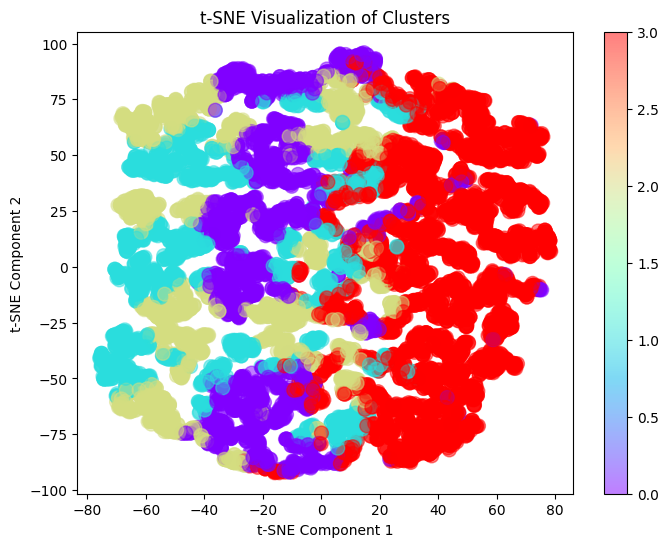

In [ ]:
tsne=TSNE(n_components=2,perplexity=30,learning_rate=200,random_state=42)
X_tsne=tsne.fit_transform(X_scaled)
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans.labels_,cmap='rainbow', s=100,alpha=0.5)
plt.title('t-SNE Visualization of Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar()
plt.show()

red are high performers cyan amd blue moderate and purple poor performers

In [ ]:
#applying silhoute scoring
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.1948932981158078


A silhouette score of 0.19 is on the lower side, which suggests that the clustering structure is not very strong. Here’s what it typically means:

Clusters overlap quite a bit.

Points may not be clearly assigned to one cluster.

Clustering might not be very meaningful or distinct in the feature space you used.